In [1]:
import pandas as pd

In [30]:
from sklearn import feature_selection

In [39]:
import matplotlib.pyplot as plt

In [40]:
import seaborn as sns

In [48]:
import numpy as np

In [2]:
rt = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-01-25/ratings.csv')
dt = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-01-25/details.csv')

In [4]:
pd.DataFrame.info(rt)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21831 entries, 0 to 21830
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num            21831 non-null  int64  
 1   id             21831 non-null  int64  
 2   name           21831 non-null  object 
 3   year           21831 non-null  int64  
 4   rank           21831 non-null  int64  
 5   average        21831 non-null  float64
 6   bayes_average  21831 non-null  float64
 7   users_rated    21831 non-null  int64  
 8   url            21831 non-null  object 
 9   thumbnail      21825 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 1.7+ MB


In [5]:
pd.DataFrame.info(dt)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21631 entries, 0 to 21630
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   num                      21631 non-null  int64 
 1   id                       21631 non-null  int64 
 2   primary                  21631 non-null  object
 3   description              21630 non-null  object
 4   yearpublished            21631 non-null  int64 
 5   minplayers               21631 non-null  int64 
 6   maxplayers               21631 non-null  int64 
 7   playingtime              21631 non-null  int64 
 8   minplaytime              21631 non-null  int64 
 9   maxplaytime              21631 non-null  int64 
 10  minage                   21631 non-null  int64 
 11  boardgamecategory        21348 non-null  object
 12  boardgamemechanic        20041 non-null  object
 13  boardgamefamily          17870 non-null  object
 14  boardgameexpansion       5506 non-null

In [17]:
rt = rt.drop(['num', 'url', 'thumbnail'], axis=1)
rt

,id,name,year,rank,average,bayes_average,users_rated
0,30549,Pandemic,2008,106,7.59,7.487,108975
1,822,Carcassonne,2000,190,7.42,7.309,108738
2,13,Catan,1995,429,7.14,6.970,108024
3,68448,7 Wonders,2010,73,7.74,7.634,89982
4,36218,Dominion,2008,104,7.61,7.499,81561
...,...,...,...,...,...,...,...
21826,296892,Sacred Rites,2020,12749,7.37,5.531,30
21827,217378,BABEL,2016,15017,6.61,5.517,30
21828,18063,Goldrush,1970,19460,5.00,5.488,30
21829,10052,Bongo Kongo,1989,17257,5.80,5.505,30


In [16]:
dt = dt.drop(['primary', 'description', 'num', 'boardgamefamily', 'boardgameexpansion', 'boardgameimplementation'], axis = 1)

In [18]:
bg = pd.merge(rt, dt, on = 'id')

In [19]:
bg

,id,name,year,rank,average,bayes_average,users_rated,yearpublished,minplayers,maxplayers,...,minage,boardgamecategory,boardgamemechanic,boardgamedesigner,boardgameartist,boardgamepublisher,owned,trading,wanting,wishing
0,30549,Pandemic,2008,106,7.59,7.487,108975,2008,2,4,...,8,['Medical'],"['Action Points', 'Cooperative Game', 'Hand Ma...",['Matt Leacock'],"['Josh Cappel', 'Christian Hanisch', 'Régis Mo...","['Z-Man Games', 'Albi', 'Asmodee', 'Asmodee It...",168364,2508,625,9344
1,822,Carcassonne,2000,190,7.42,7.309,108738,2000,2,5,...,7,"['City Building', 'Medieval', 'Territory Build...","['Area Majority / Influence', 'Map Addition', ...",['Klaus-Jürgen Wrede'],"['Doris Matthäus', 'Anne Pätzke', 'Chris Quill...","['Hans im Glück', '999 Games', 'Albi', 'Bard C...",161299,1716,582,7383
2,13,Catan,1995,429,7.14,6.970,108024,1995,3,4,...,10,"['Economic', 'Negotiation']","['Dice Rolling', 'Hexagon Grid', 'Income', 'Mo...",['Klaus Teuber'],"['Volkan Baga', 'Tanja Donner', 'Pete Fenlon',...","['KOSMOS', '999 Games', 'Albi', 'Asmodee', 'As...",167733,2018,485,5890
3,68448,7 Wonders,2010,73,7.74,7.634,89982,2010,2,7,...,10,"['Ancient', 'Card Game', 'City Building', 'Civ...","['Drafting', 'Hand Management', 'Set Collectio...",['Antoine Bauza'],"['Dimitri Chappuis', 'Miguel Coimbra', 'Etienn...","['Repos Production', 'ADC Blackfire Entertainm...",120466,1567,1010,12105
4,36218,Dominion,2008,104,7.61,7.499,81561,2008,2,4,...,13,"['Card Game', 'Medieval']","['Deck, Bag, and Pool Building', 'Delayed Purc...",['Donald X. Vaccarino'],"['Matthias Catrein', 'Julien Delval', 'Tomasz ...","['Rio Grande Games', '999 Games', 'Albi', 'Bar...",106956,2009,655,8621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21626,296892,Sacred Rites,2020,12749,7.37,5.531,30,2020,3,9,...,8,"['Bluffing', 'Deduction', 'Humor', 'Party Game...","['Acting', 'Roles with Asymmetric Information'...","['Julia Koerwer', 'Jono Naito']",['Kristena Derrick'],['Story Machine Games'],112,8,4,32
21627,217378,BABEL,2016,15017,6.61,5.517,30,2016,1,5,...,10,"['Action / Dexterity', 'Bluffing', 'Card Game'...","['Cooperative Game', 'Hand Management']",['Masakazu Takizawa (たきざわ まさかず)'],['Masakazu Takizawa (たきざわ まさかず)'],"['こぐま工房 (Koguma Koubou)', 'Arclight']",64,1,6,21
21628,18063,Goldrush,1970,19460,5.00,5.488,30,1970,2,4,...,10,"['American West', 'Dice', 'Exploration', 'Figh...","['Dice Rolling', 'Memory', 'Pick-up and Delive...",['(Uncredited)'],NaN,"['Clipper', 'Condor', 'Joker', 'Pelikan']",98,7,4,5
21629,10052,Bongo Kongo,1989,17257,5.80,5.505,30,1989,2,4,...,5,"['Action / Dexterity', 'Animals', ""Children's ...",NaN,['(Uncredited)'],NaN,"['Ideal', 'Interplay (Board Game Related)', 'M...",52,4,8,13


In [34]:
bg.columns

Index(['id', 'name', 'year', 'rank', 'average', 'bayes_average', 'users_rated',
       'yearpublished', 'minplayers', 'maxplayers', 'playingtime',
       'minplaytime', 'maxplaytime', 'minage', 'boardgamecategory',
       'boardgamemechanic', 'boardgamedesigner', 'boardgameartist',
       'boardgamepublisher', 'owned', 'trading', 'wanting', 'wishing'],
      dtype='object')

In [43]:
cr = bg.corr()

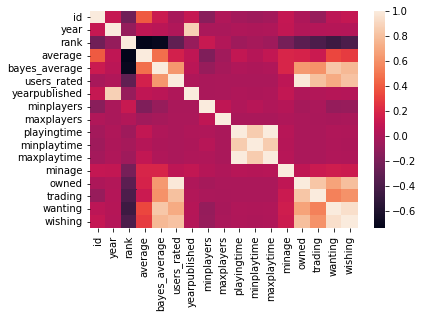

In [45]:
sns.heatmap(cr, xticklabels=cr.columns, yticklabels=cr.columns)

In [90]:
ct = np.array(bg['boardgamecategory'])
un = set()

In [98]:
for c in ct:
  if type(c) == str:
    for x in c.split(','):
      if len(x.strip("""''[] """"")) > 1:
        un.add(x.strip("""''[ ]"""))

In [178]:
for n in range(len(un)):
  print(n, list(un)[n])

0 Farming
1 Economic
2 Math
3 Vietnam War
4 Dice
5 Horror
6 Bluffing
7 Deduction
8 Real-time
9 Novel-based
10 Territory Building
11 Abstract Strategy
12 World War II
13 Napoleonic
14 Nautical
15 Medieval
16 Ancient
17 Party Game
18 Trivia
19 Fan Expansion
20 Zombies
21 Prehistoric
22 Age of Reason
23 Educational
24 Comic Book / Strip
25 Civilization
26 Pike and Shot
27 Maze
28 Sports
29 Modern Warfare
30 Game System
31 American Indian Wars
32 Industry / Manufacturing
33 Electronic
34 Racing
35 Murder/Mystery
36 Mythology
37 Print & Play
38 Memory
39 Card Game
40 Number
41 Puzzle
42 Exploration
43 City Building
44 "Children's Game"
45 Mature / Adult
46 Korean War
47 Collectible Components
48 Post-Napoleonic
49 Mafia
50 Transportation
51 World War I
52 Action / Dexterity
53 Arabian
54 Fighting
55 Miniatures
56 Negotiation
57 American West
58 Adventure
59 Wargame
60 Space Exploration
61 Aviation / Flight
62 Expansion for Base-game
63 Political
64 Fantasy
65 Movies / TV / Radio theme
66 En

In [142]:
gn = dict()
for n in range(len(un)):
  gn[n] = []

In [143]:
for n in range(len(un)):
  for x in ct:
    if x is not np.nan:
      if list(un)[n] in x:
        gn[n].append(1)
      else:
        gn[n].append(0)
    else:
      gn[n].append(0)

In [144]:
for el in gn:
  bg.insert(len(bg.columns), el, np.array(gn[el]))

In [145]:
bg

,id,name,year,rank,average,bayes_average,users_rated,yearpublished,minplayers,maxplayers,...,74,75,76,77,78,79,80,81,82,83
0,30549,Pandemic,2008,106,7.59,7.487,108975,2008,2,4,...,0,0,0,0,0,0,0,0,0,1
1,822,Carcassonne,2000,190,7.42,7.309,108738,2000,2,5,...,0,0,0,0,0,0,0,0,0,0
2,13,Catan,1995,429,7.14,6.970,108024,1995,3,4,...,0,0,0,0,0,0,0,0,0,0
3,68448,7 Wonders,2010,73,7.74,7.634,89982,2010,2,7,...,0,0,0,0,0,0,0,0,0,0
4,36218,Dominion,2008,104,7.61,7.499,81561,2008,2,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21626,296892,Sacred Rites,2020,12749,7.37,5.531,30,2020,3,9,...,0,1,0,0,0,1,0,0,0,0
21627,217378,BABEL,2016,15017,6.61,5.517,30,2016,1,5,...,0,0,0,0,0,0,0,0,0,0
21628,18063,Goldrush,1970,19460,5.00,5.488,30,1970,2,4,...,0,0,0,0,0,0,0,0,0,0
21629,10052,Bongo Kongo,1989,17257,5.80,5.505,30,1989,2,4,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
for el in gn:
  print(el)
  for x in bg[bg[el] == 1]['minage']:
    age_c = age_c.append({'category' : el, 'age' : x}, ignore_index = True)

In [164]:
age_c = pd.DataFrame(columns = ['category', 'age'])

,category,age
0,0,12
1,0,12
2,0,13
3,0,8
4,0,13
...,...,...
58817,83,13
58818,83,8
58819,83,9
58820,83,10


In [ ]:
#year
year_c = pd.DataFrame(columns = ['category', 'year'])
year_c

In [ ]:
for el in gn:
  print(el)
  for x in bg[bg[el] == 1]['year']:
    year_c = year_c.append({'category' : el, 'year' : x}, ignore_index = True)

In [ ]:
plt.figure(figsize=(50, 25))
sns.boxplot(x = 'category', y = 'year', data = year_c, width = 1, showfliers = 0)

In [252]:
year_m = pd.DataFrame(columns = ['category', 'mean'])
for el in gn:
  mean = pd.DataFrame.mean(year_c[average_c['category'] == el])['year']
  year_m = year_m.append({'category':el, 'mean': mean}, ignore_index = True)

In [253]:
mn_i = year_m.sort_values(by = ['mean'])
mn_i

,category,mean
30,30.0,1918.310345
11,11.0,1956.466667
2,2.0,1962.456954
44,44.0,1966.014679
77,77.0,1968.970588
...,...,...
73,73.0,2011.689655
83,83.0,2011.919540
43,43.0,2012.132576
20,20.0,2012.879808


(array([1920., 1940., 1960., 1980., 2000., 2020., 2040.]),
 <a list of 7 Text major ticklabel objects>)

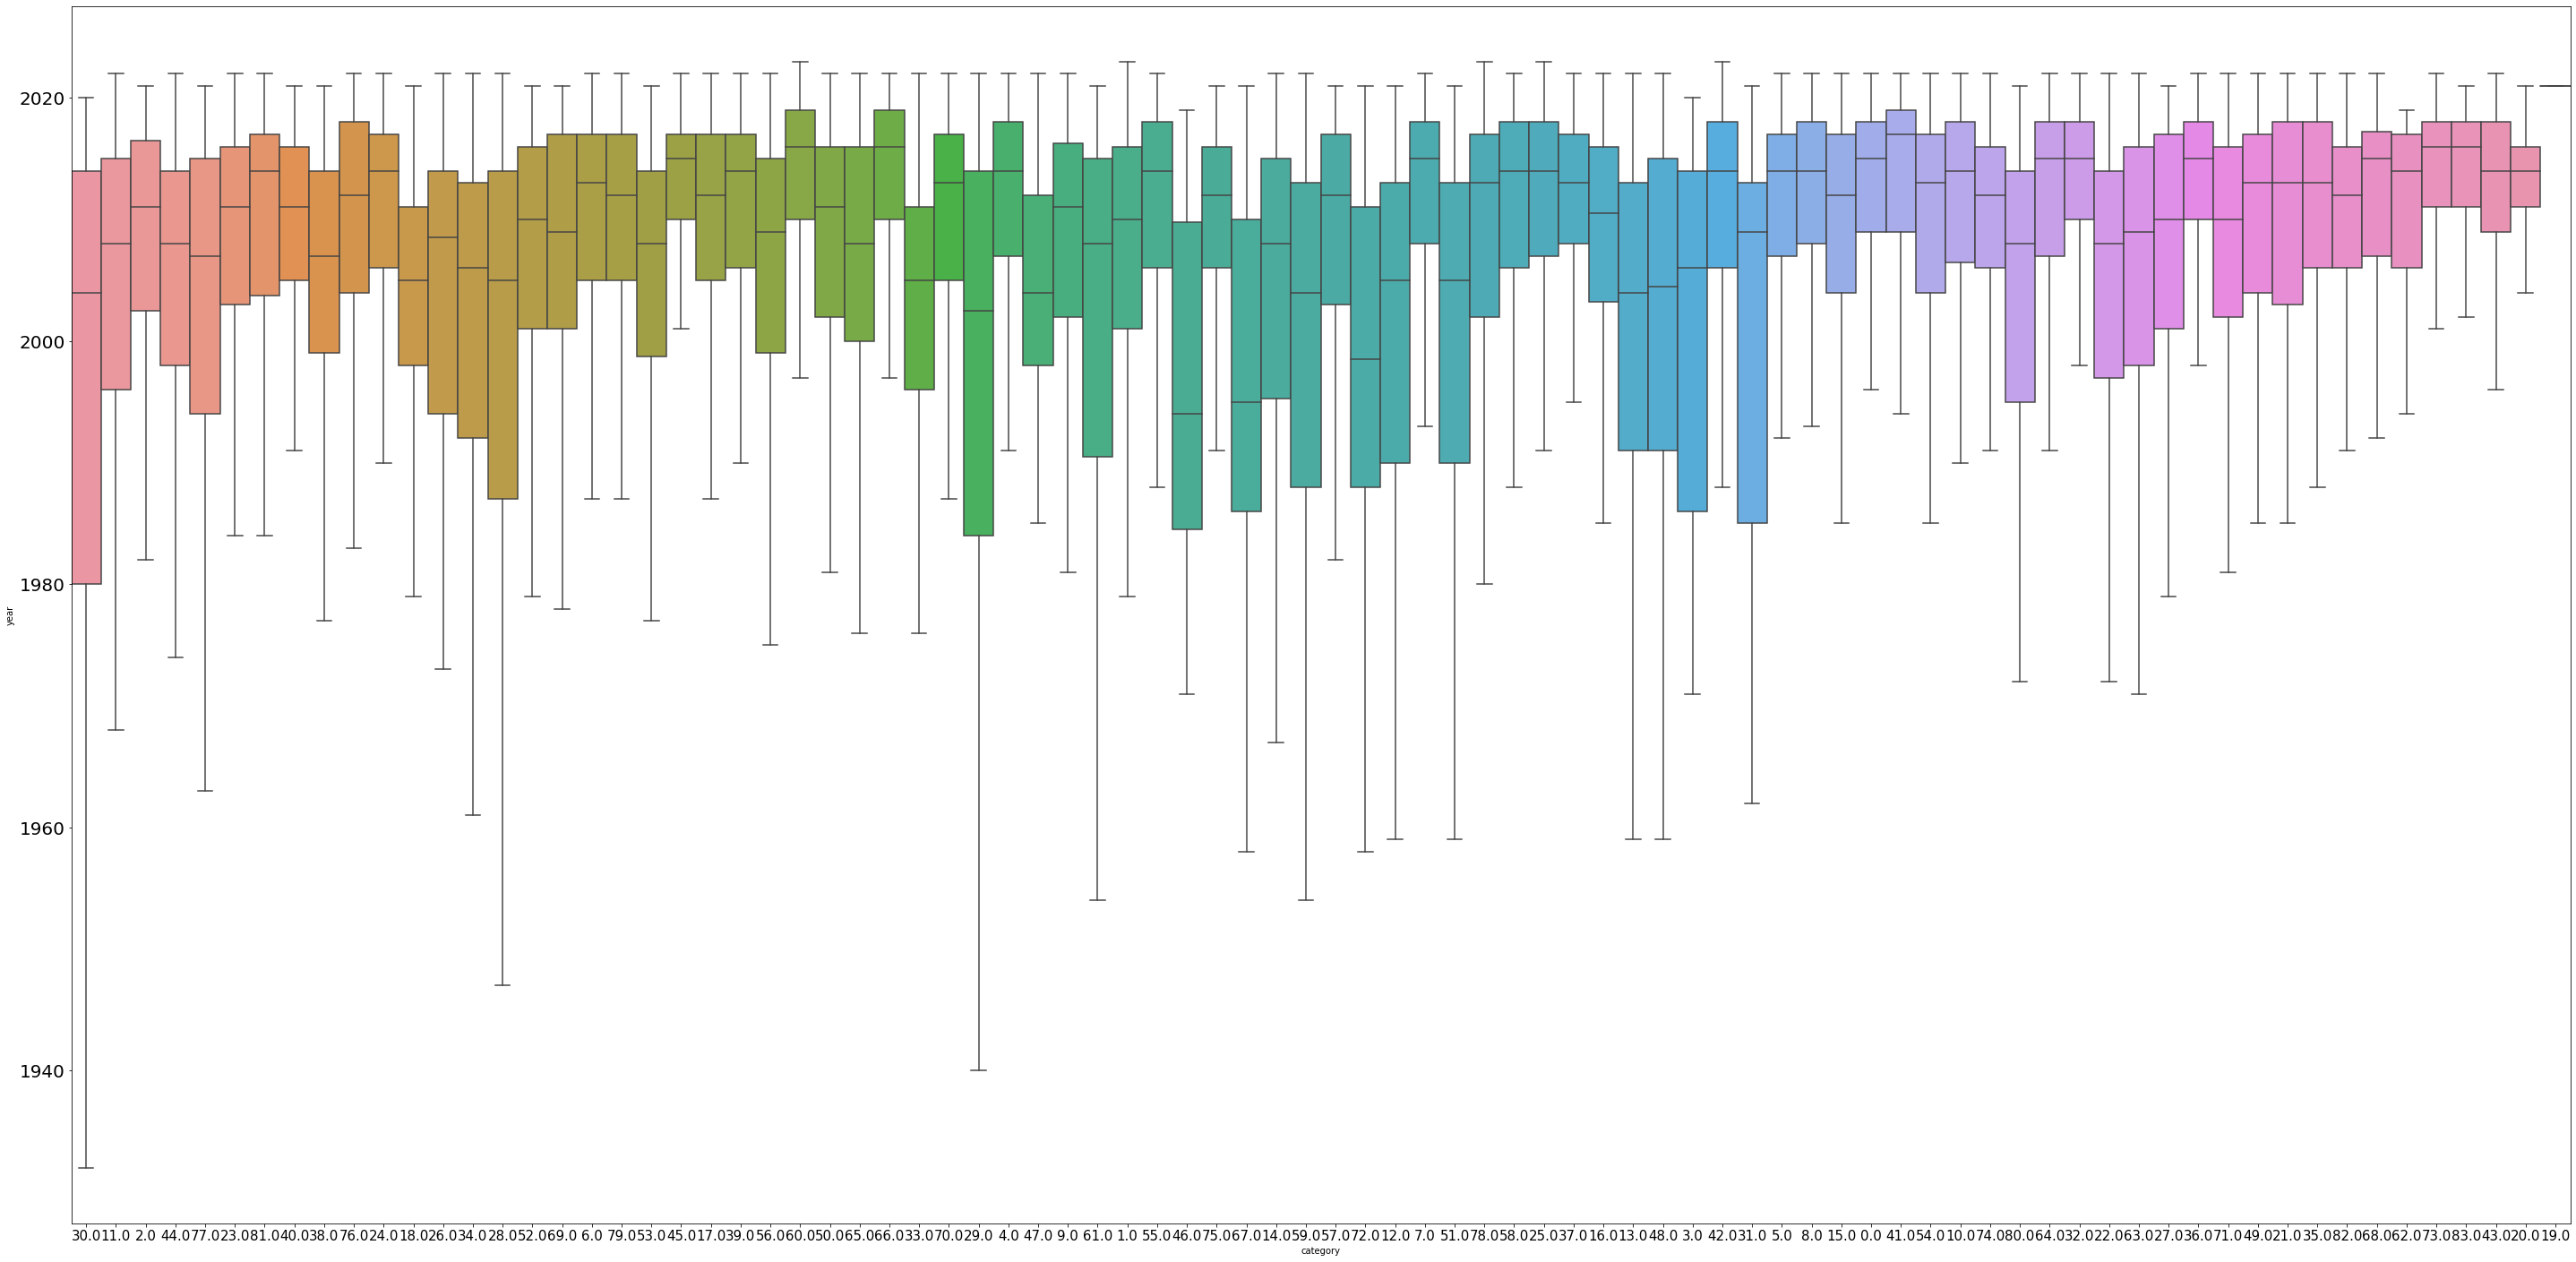

In [254]:
plt.figure(figsize=(50, 25))
plt.axes
sns.boxplot(x = 'category', y = 'year', data = year_c, width = 1, showfliers = 0, order = mn_i['category'])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 20)

In [ ]:
#average_rating
average_c = pd.DataFrame(columns = ['category', 'average'])
for el in gn:
  print(el)
  for x in bg[bg[el] == 1]['average']:
    average_c = average_c.append({'category' : el, 'average' : x}, ignore_index = True)

In [ ]:
plt.figure(figsize=(50, 25))
sns.boxplot(x = 'category', y = 'average', data = average_c, width = 1)

In [235]:
average_m = pd.DataFrame(columns = ['category', 'mean'])
for el in gn:
  mean = pd.DataFrame.mean(average_c[average_c['category'] == el])['average']
  average_m = average_m.append({'category':el, 'mean': mean}, ignore_index = True)

In [236]:
mn_i = average_m.sort_values(by = ['mean'])
mn_i

,category,mean
18,18.0,5.600103
44,44.0,5.685040
33,33.0,5.700597
65,65.0,5.858344
38,38.0,5.892344
...,...,...
22,22.0,7.074639
80,80.0,7.136164
55,55.0,7.233630
62,62.0,7.399583


(array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 9 Text major ticklabel objects>)

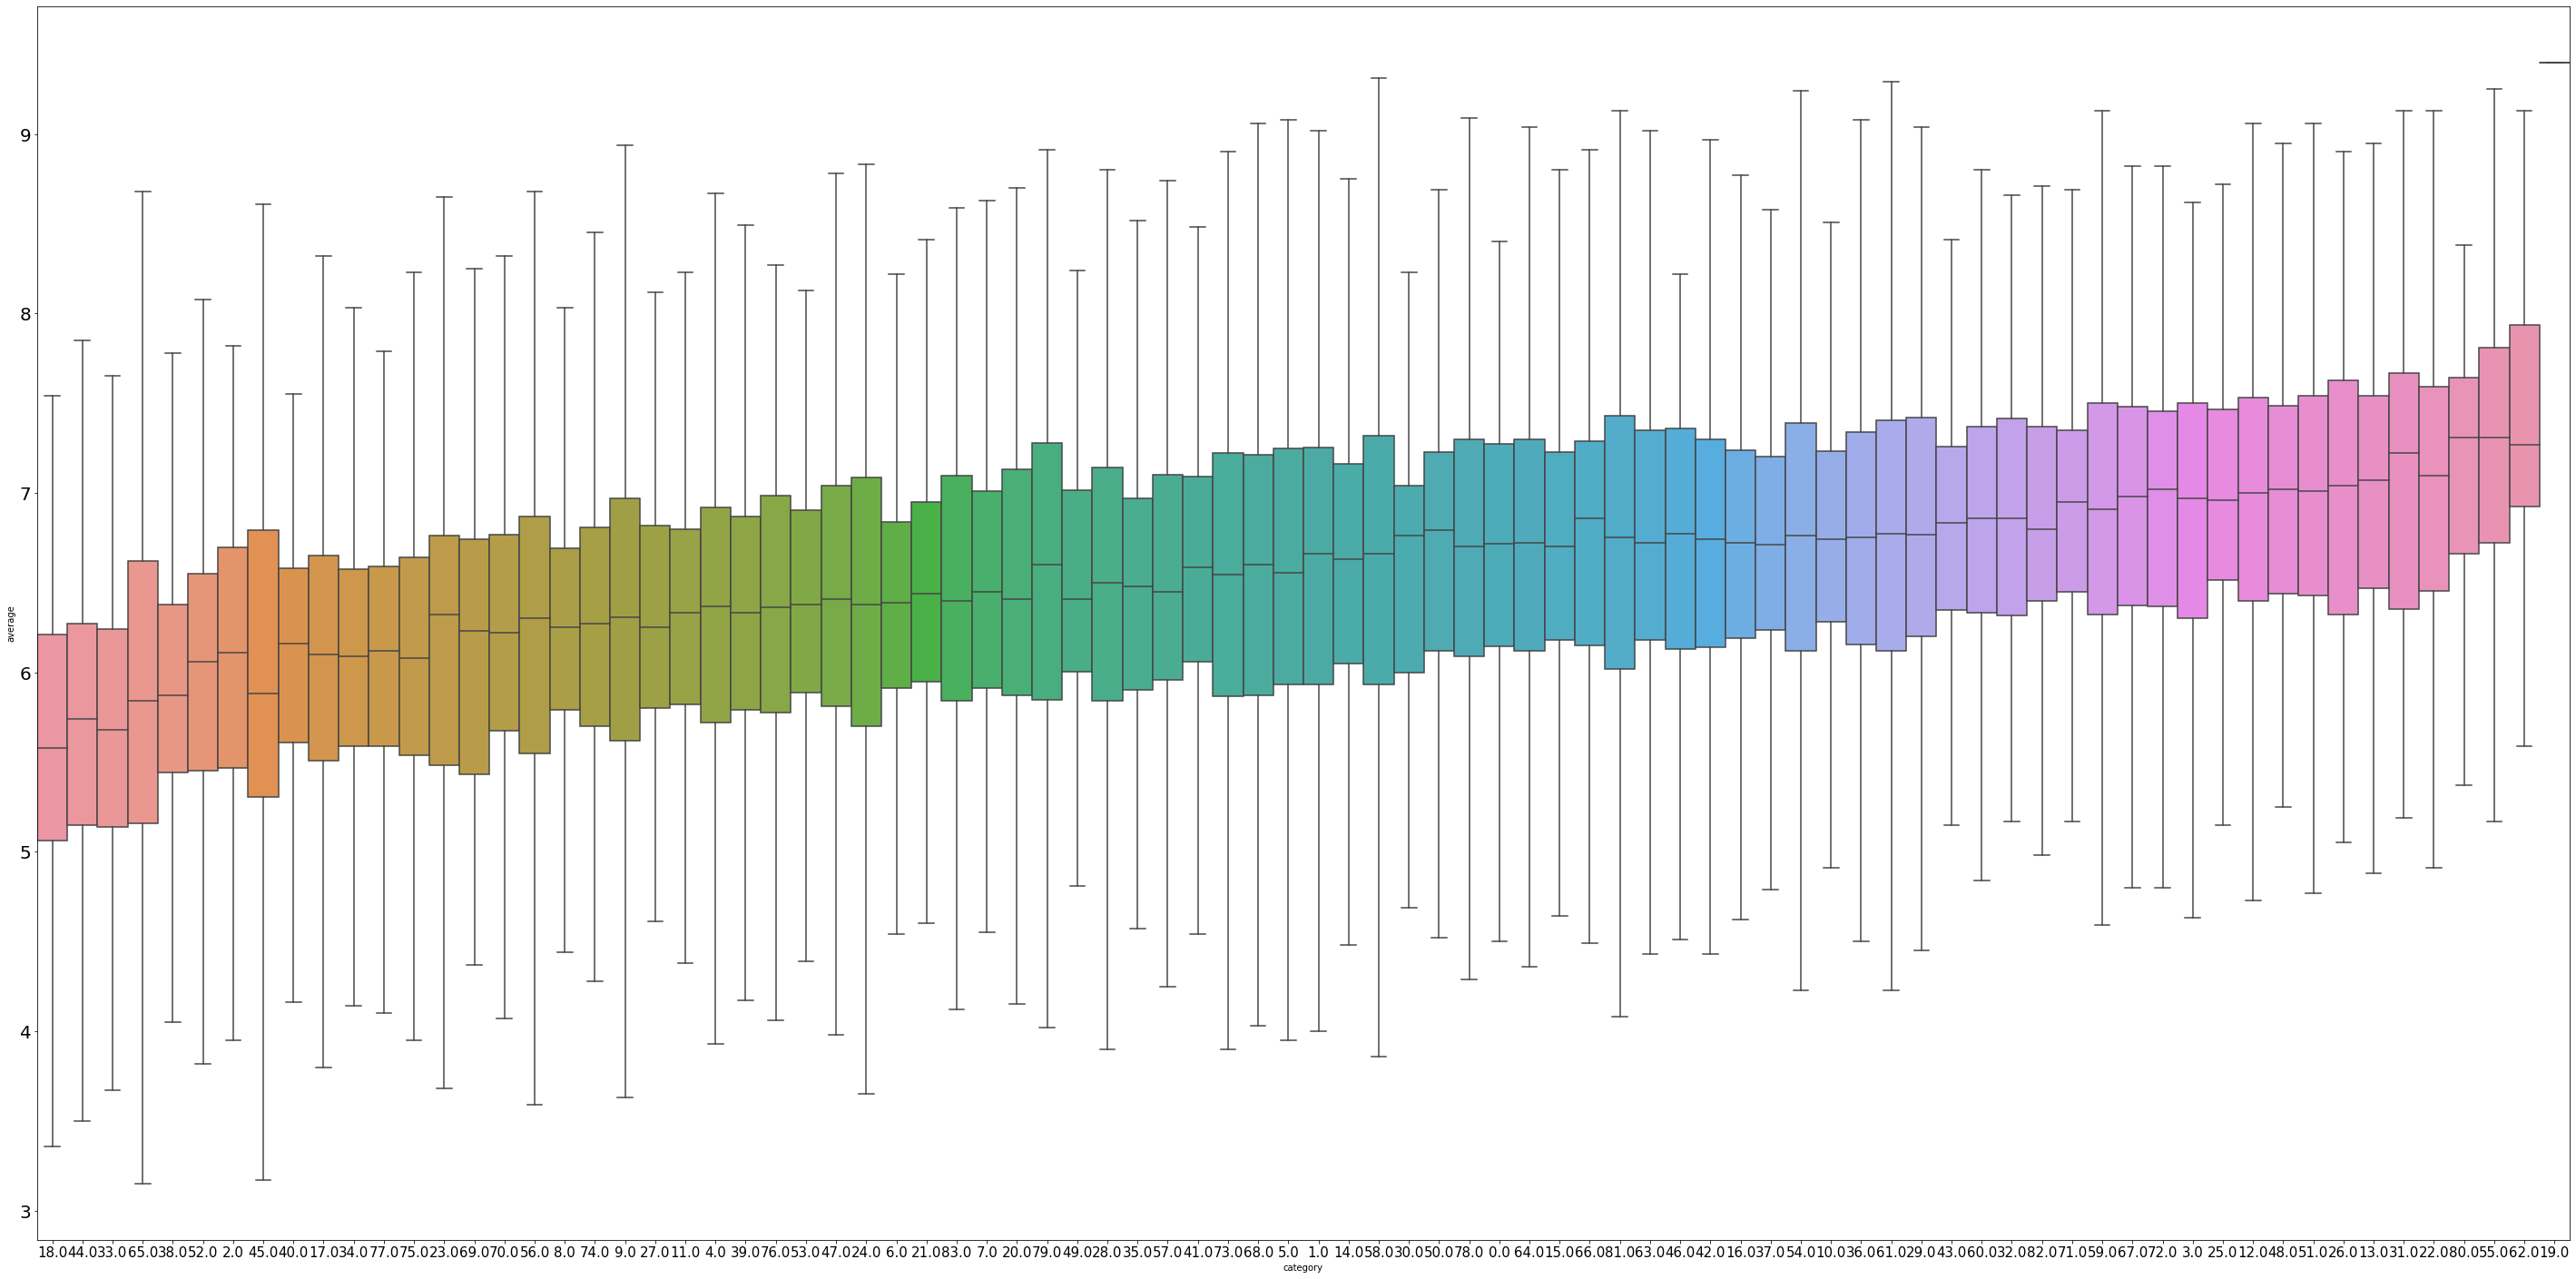

In [247]:
plt.figure(figsize=(50, 25))
plt.axes
sns.boxplot(x = 'category', y = 'average', data = average_c, width = 1, showfliers = 0, order = mn_i['category'])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 20)

In [186]:
#min_players
min_players_c = pd.DataFrame(columns = ['category', 'min_players'])

In [ ]:
for el in gn:
  print(el)
  for x in bg[bg[el] == 1]['minplayers']:
    min_players_c = min_players_c.append({'category' : el, 'minplayers' : x}, ignore_index = True)

In [ ]:
plt.figure(figsize=(50, 25))
sns.boxplot(x = 'category', y = 'minplayers', data = min_players_c, width = 1)

In [230]:
min_players_m = pd.DataFrame(columns = ['category', 'mean'])
for el in gn:
  mean = pd.DataFrame.mean(min_players_c[min_players_c['category'] == el])['minplayers']
  min_players_m = min_players_m.append({'category':el, 'mean': mean}, ignore_index = True)

In [232]:
mn_i = min_players_m.sort_values(by = ['mean'])
mn_i

,category,mean
30,30.0,1.241379
3,3.0,1.569231
41,41.0,1.584320
46,46.0,1.653846
58,58.0,1.654530
...,...,...
56,56.0,2.582953
6,6.0,2.592869
45,45.0,2.660256
49,49.0,2.741722


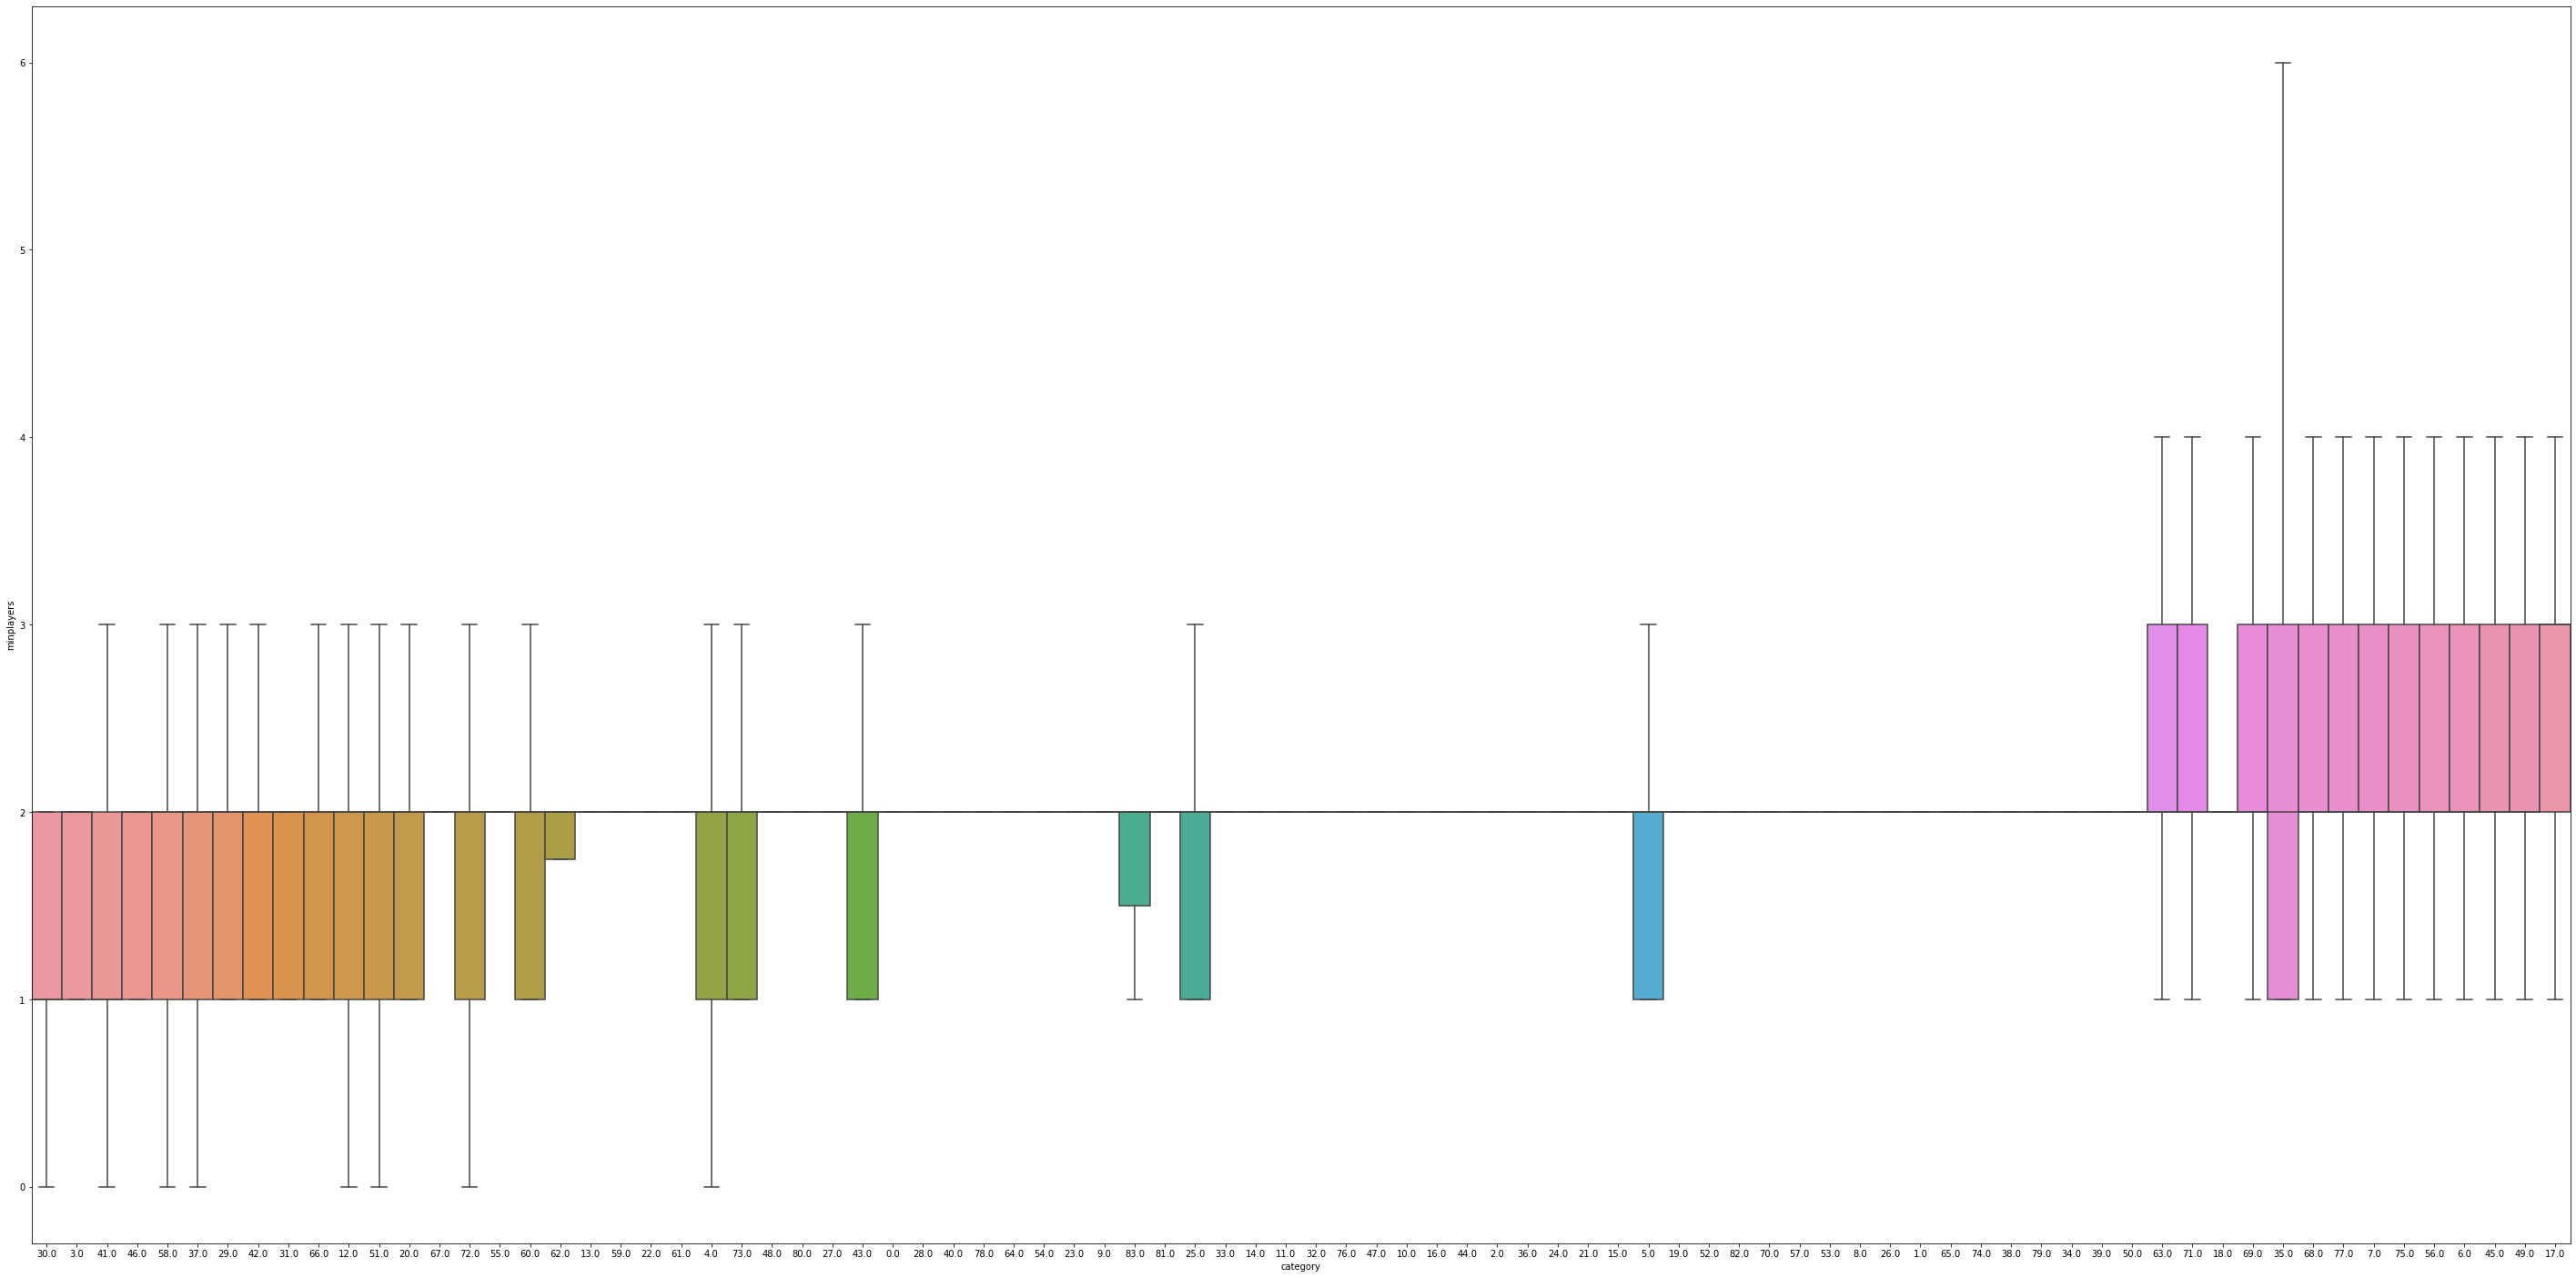

In [234]:
plt.figure(figsize=(50, 25))
sns.boxplot(x = 'category', y = 'minplayers', data = min_players_c, width = 1, showfliers = 0, order = mn_i['category'])

In [ ]:
plt.figure(figsize=(50, 25))
sns.boxplot(x = 'category', y = 'age', data = age_c, width = 1)

In [192]:
#playing_time
playing_time_c = pd.DataFrame(columns = ['category', 'playingtime'])

In [ ]:
for el in gn:
  print(el)
  for x in bg[bg[el] == 1]['playingtime']:
    playing_time_c = playing_time_c.append({'category' : el, 'playingtime' : x}, ignore_index = True)

In [ ]:
plt.figure(figsize=(50, 25))
sns.boxplot(x = 'category', y = 'playingtime', data = playing_time_c, width = 1, showfliers = 0)

In [216]:
mn = pd.DataFrame(columns = ['category', 'mean'])
for el in gn:
  mean = pd.DataFrame.mean(playing_time_c[playing_time_c['category'] == el])['playingtime']
  mn = mn.append({'category':el, 'mean': mean}, ignore_index = True)

In [220]:
mn_i = mn.sort_values(by = ['mean'])
mn_i

,category,mean
19,19.0,0.000000
44,44.0,21.595719
52,52.0,23.959633
40,40.0,25.918367
30,30.0,30.344828
...,...,...
72,72.0,297.034884
3,3.0,317.692308
67,67.0,337.427984
51,51.0,379.992948


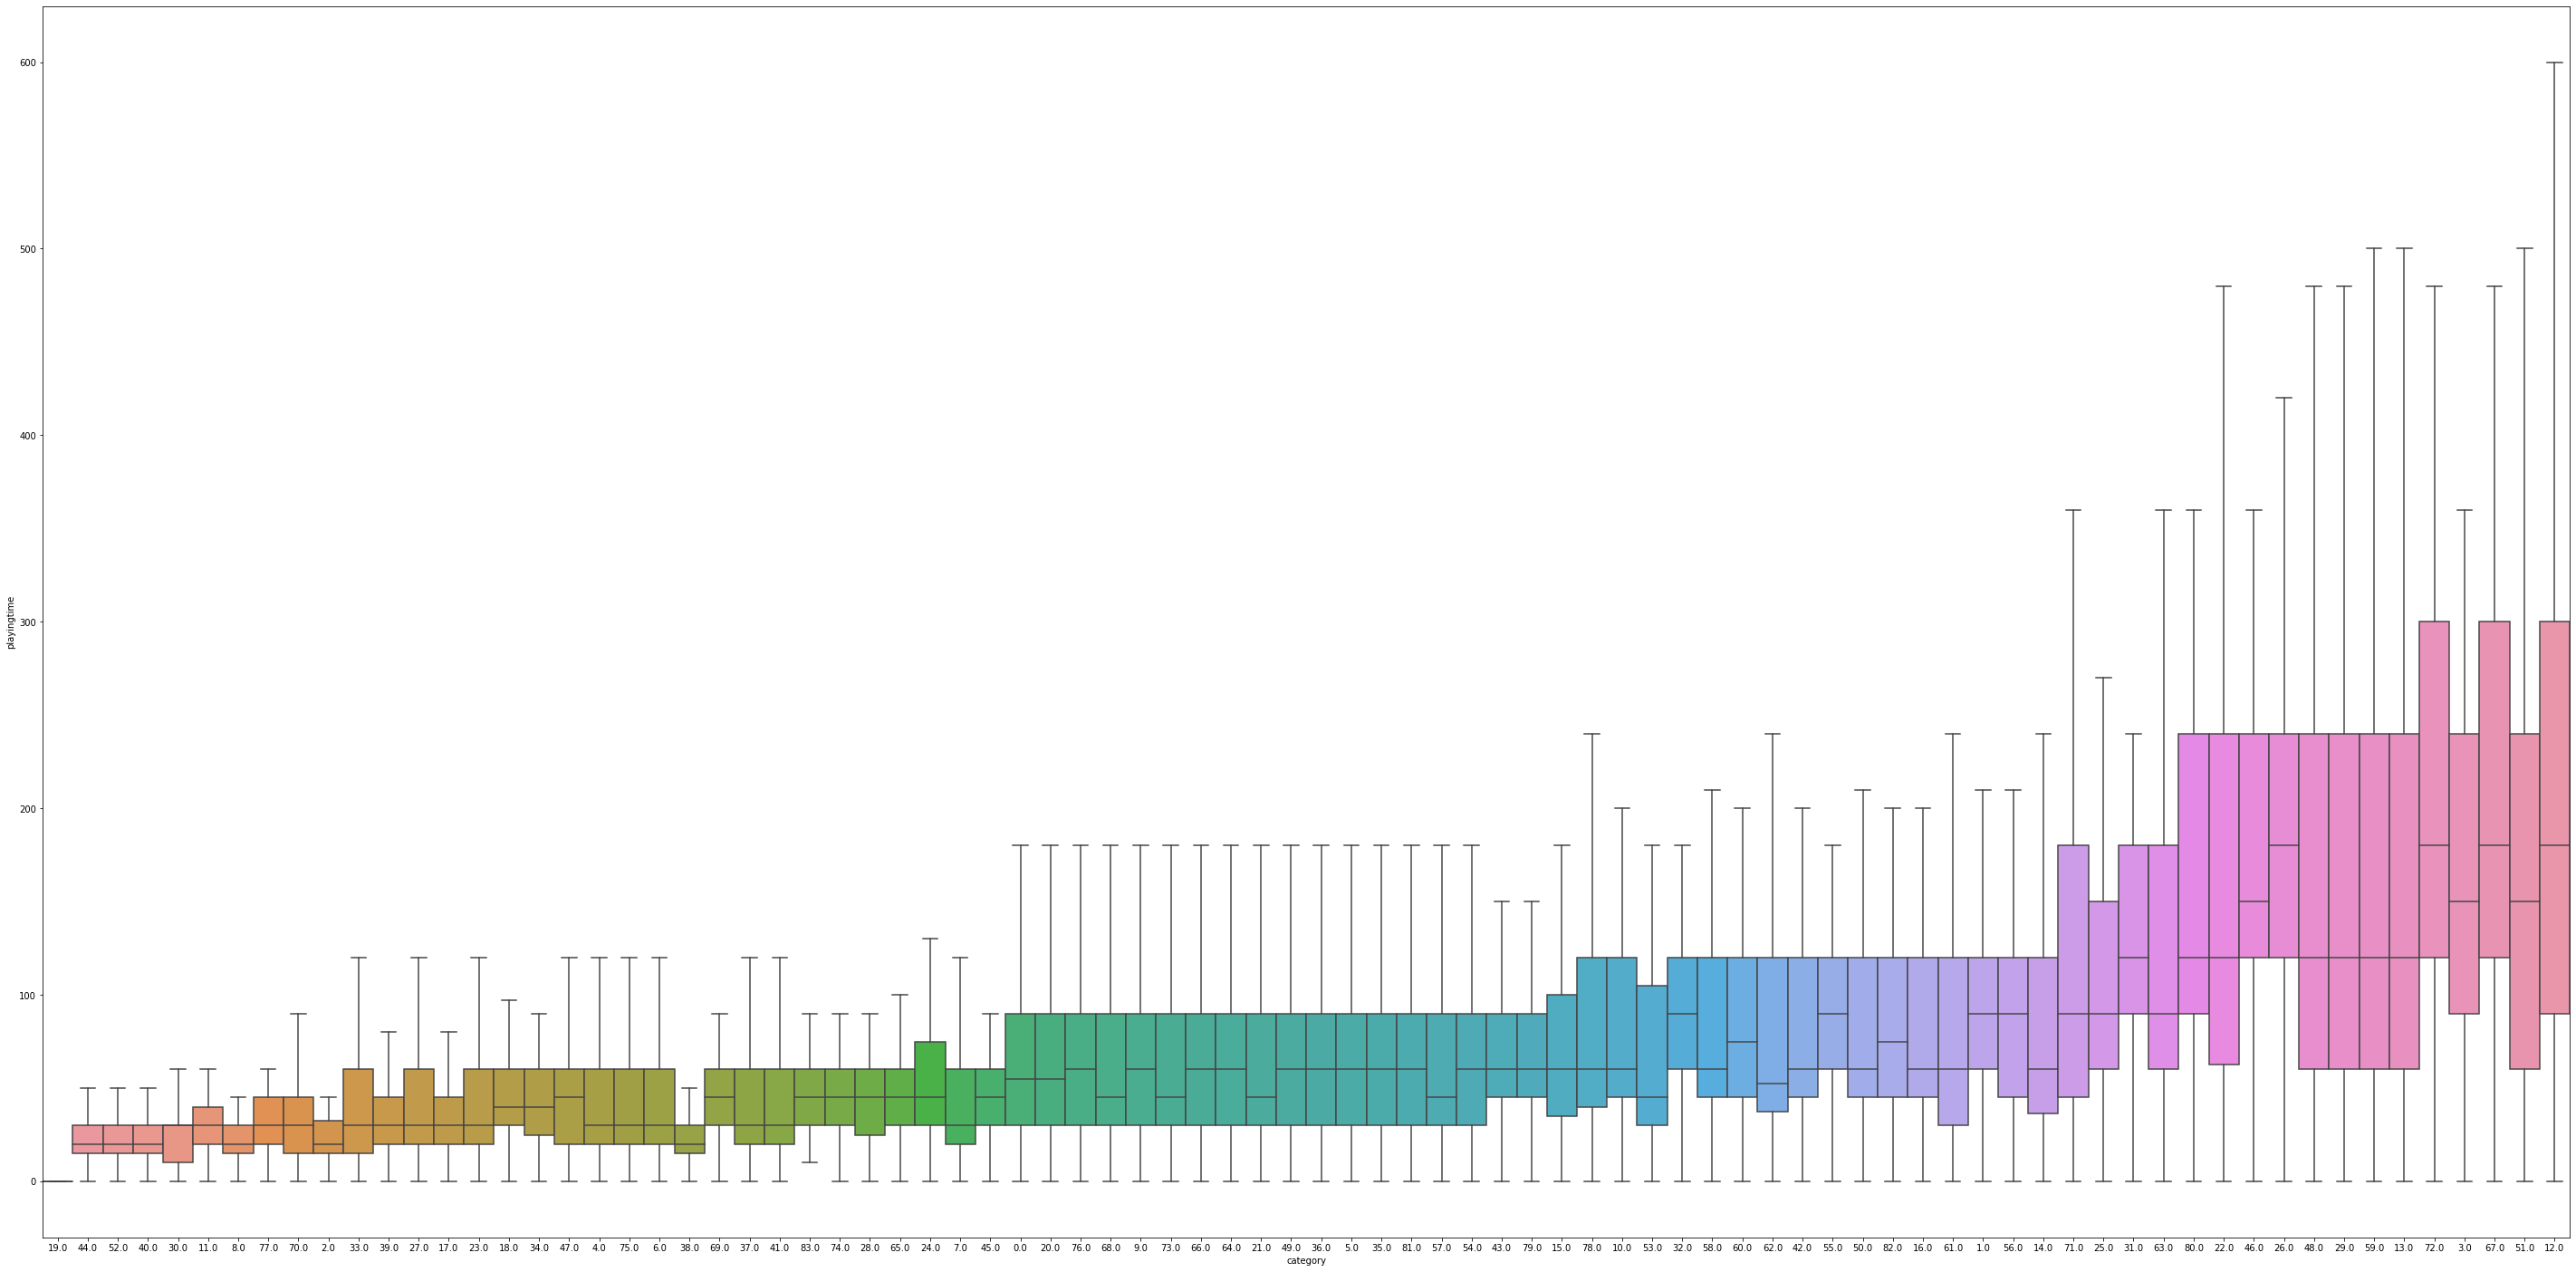

In [229]:
plt.figure(figsize=(50, 25))
sns.boxplot(x = 'category', y = 'playingtime', data = playing_time_c, width = 1, showfliers = 0, order = mn_i['category'])

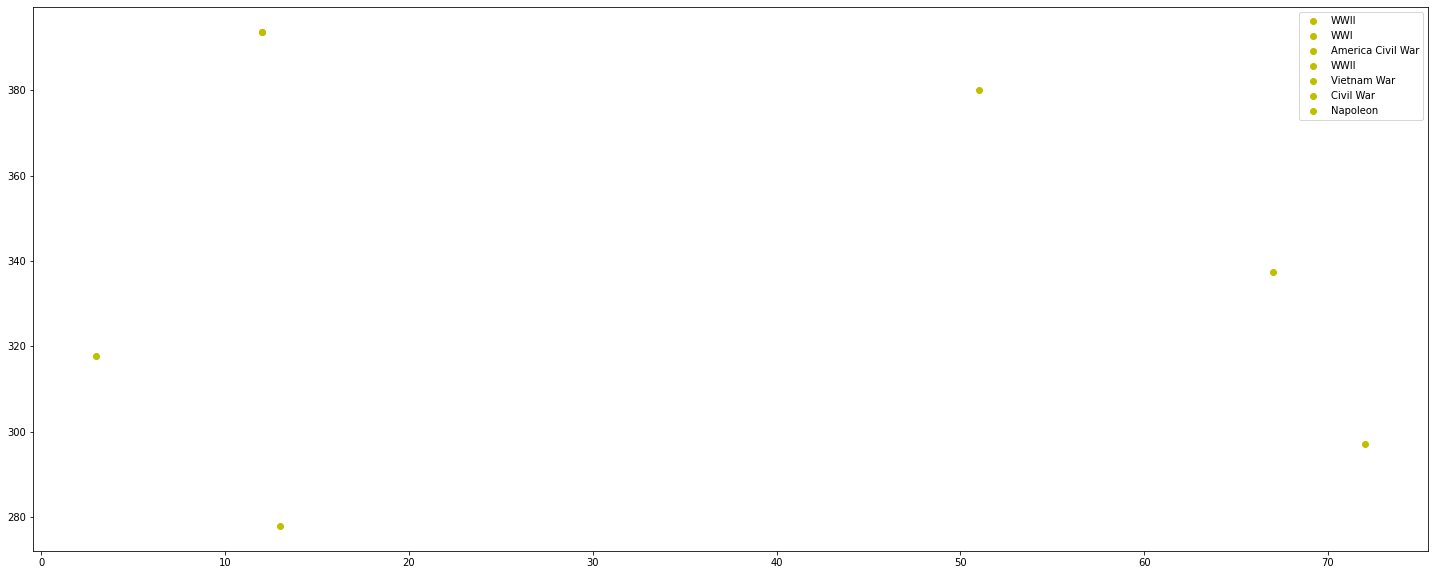

In [272]:
plt.figure(figsize=(25, 10))
plt.plot(12, float(mn[mn['category'] == 12]['mean']), 'yo', label='WWII')
plt.plot(51, float(mn[mn['category'] == 51]['mean']), 'yo', label='WWI')
plt.plot(67, float(mn[mn['category'] == 67]['mean']), 'yo', label='America Civil War')
plt.plot(12, float(mn[mn['category'] == 12]['mean']), 'yo', label='WWII')
plt.plot(3, float(mn[mn['category'] == 3]['mean']), 'yo', label='Vietnam War')
plt.plot(72, float(mn[mn['category'] == 72]['mean']), 'yo', label='Civil War')
plt.plot(13, float(mn[mn['category'] == 13]['mean']), 'yo', label='Napoleon')

plt.legend()
plt.show()

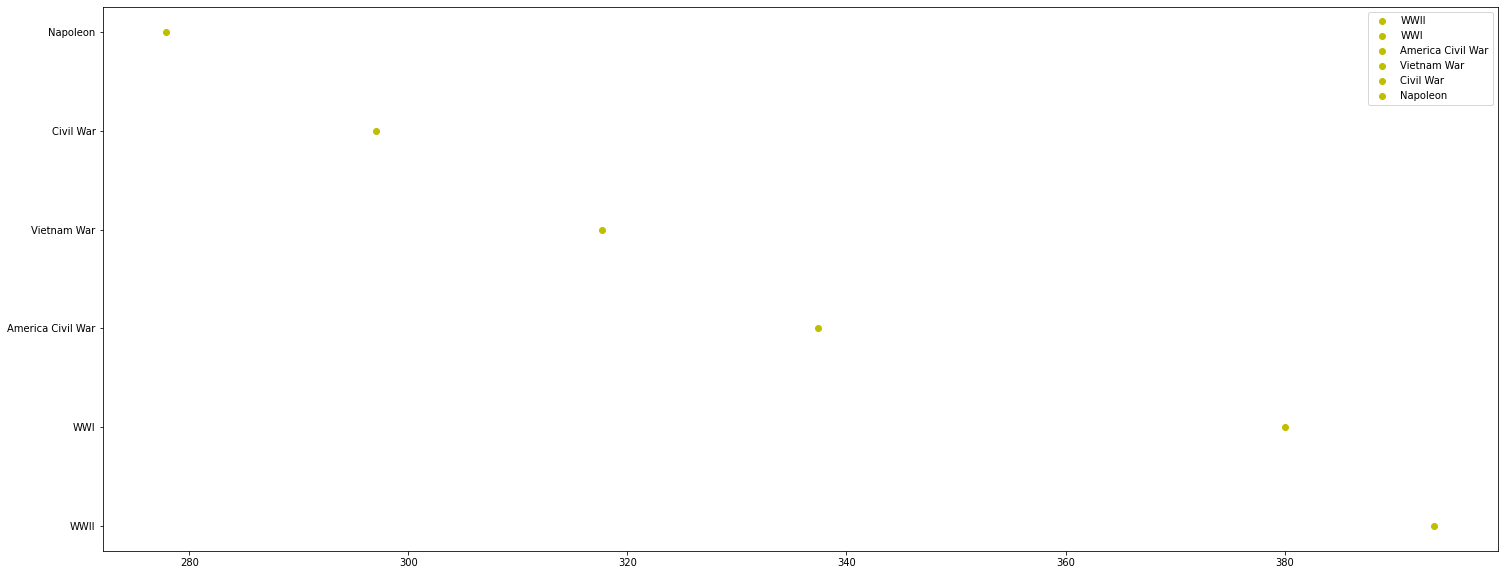

In [276]:
plt.figure(figsize=(25, 10))
plt.plot(float(mn[mn['category'] == 12]['mean']), 'WWII', 'yo', label='WWII')
plt.plot(float(mn[mn['category'] == 51]['mean']), 'WWI', 'yo', label='WWI')
plt.plot(float(mn[mn['category'] == 67]['mean']), 'America Civil War', 'yo', label='America Civil War')
plt.plot(float(mn[mn['category'] == 3]['mean']), 'Vietnam War', 'yo', label='Vietnam War')
plt.plot(float(mn[mn['category'] == 72]['mean']), 'Civil War', 'yo', label='Civil War')
plt.plot(float(mn[mn['category'] == 13]['mean']), 'Napoleon', 'yo', label='Napoleon')
plt.legend()
plt.show()